<a href="https://colab.research.google.com/github/FurkanAhmed2/Artificial-neural-network-prediction/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.15.0


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
#It is a binary classification problem and we need to predict if the customer will exit the bank in future or not
dataset = pd.read_csv('Churn_Modelling.csv')
#Divide the dataset into independent variable(X) and dependent Variable(Y)
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
#Feature Engineering
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Now let's make the ANN!

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
#The activation function will be used in the next laye but we need to mention it here only
classifier.add(Dense(units=11,activation='relu'))

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [13]:
# Adding the output layer
classifier.add(Dense(units=1,activation='relu'))

In [16]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#By default Adam optimizer uses the learning rate of 0.1

In [15]:
#Tain the entire Neural Network
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 8s 4ms/step - loss: 1.0848 - accuracy: 0.7235 - val_loss: 0.7562 - val_accuracy: 0.7641
Epoch 2/50
536/536 [==============================] - 2s 4ms/step - loss: 0.6241 - accuracy: 0.7669 - val_loss: 0.5560 - val_accuracy: 0.7785
Epoch 3/50
536/536 [==============================] - 2s 4ms/step - loss: 0.5468 - accuracy: 0.7873 - val_loss: 0.5365 - val_accuracy: 0.7989
Epoch 4/50
536/536 [==============================] - 2s 4ms/step - loss: 0.5057 - accuracy: 0.8009 - val_loss: 0.4983 - val_accuracy: 0.8016
Epoch 5/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4742 - accuracy: 0.8050 - val_loss: 0.4801 - val_accuracy: 0.8046
Epoch 6/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4633 - accuracy: 0.8117 - val_loss: 0.4912 - val_accuracy: 0.8069
Epoch 7/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4556 - accuracy: 0.8130 - val_loss: 0.4930 - val_accuracy: 0.8126
Epoch 

In [17]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


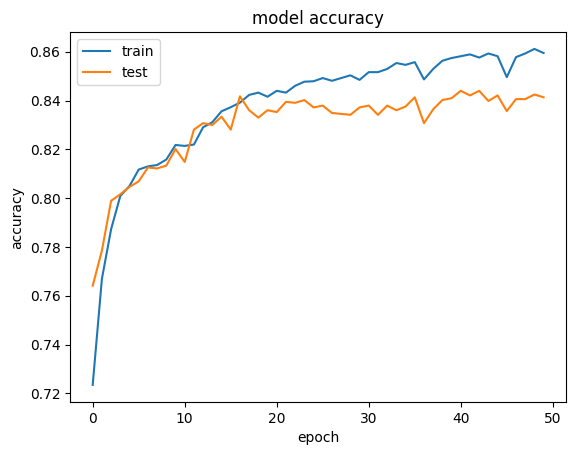

In [18]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

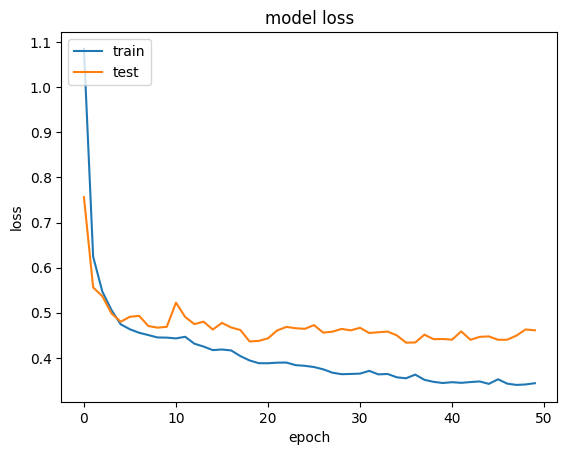

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1513,   82],
       [ 204,  201]])

In [22]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [23]:
score

0.857